In [1]:

%matplotlib inline


# Knuth Miles

An example that shows how to add your own positions to nodes
and have graphviz "neato" position the edges. 

miles_graph() returns an undirected graph over the 128 US cities from
the datafile miles_dat.txt.  

This example is described in Section 1.1 in Knuth's book [1]_ [2]_.

The data used in this example is copied from [2]_.  The filename and
header have been modified to adhere to the request of the author to
not corrupt the original source file content and name.

## References.
.. [1] Donald E. Knuth,
   "The Stanford GraphBase: A Platform for Combinatorial Computing",
   ACM Press, New York, 1993.
.. [2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html


In [2]:

import math
import re
import gzip

NUMFIND_REGEX = re.compile(r'^\d+')
def miles_graph():
    '''Return a graph from the data in miles_dat.txt.

    Edges are made between cities that are less then 300 miles apart.
    '''
    G = pgv.AGraph(name='miles_dat')
    G.node_attr['shape'] = 'circle'
    G.node_attr['fixedsize'] = 'true'
    G.node_attr['fontsize'] = '8'
    G.node_attr['style'] = 'filled'
    G.graph_attr['outputorder'] = 'edgesfirst'
    G.graph_attr['label'] = 'miles_dat'
    G.graph_attr['ratio'] = '1.0'
    G.edge_attr['color'] = '#1100FF'
    G.edge_attr['style'] = 'setlinewidth(2)'

    cities = []
    for line in gzip.open('../data/gz/miles_dat.txt.gz', 'rt'):
        if line.startswith('*'):  # skip comments
            continue

        if NUMFIND_REGEX.match(line):  # this line is distances
            dist = line.split()
            for d in dist:
                if float(d) < 300:  # connect if closer then 300 miles
                    G.add_edge(city, cities[i])
                i = i + 1
        else:  # this line is a city, position, population
            i = 1
            (city, coordpop) = line.split('[')
            cities.insert(0, city)
            (coord, pop) = coordpop.split(']')
            (y, x) = coord.split(',')
            G.add_node(city)
            n = G.get_node(city)
            # assign positions, scale to be something reasonable in points
            n.attr['pos'] = '%f,%f)' % (
                -(float(x) - 7000) / 10.0,
                (float(y) - 2000) / 10.0,
            )
            # assign node size, in sqrt of 1,000,000's of people
            d = math.sqrt(float(pop) / 1000000.0)
            n.attr['height'] = '%s' % (d / 2)
            n.attr['width'] = '%s' % (d / 2)
            # assign node color
            n.attr['fillcolor'] = '#0000%2x' % (int(d * 256))
            # empty labels
            n.attr['label'] = ' '

    return G

In [3]:

import warnings
import pygraphviz as pgv

# ignore Graphviz warning messages
warnings.simplefilter('ignore', RuntimeWarning)

# Load miles_dat.txt containing 128 cities
G = miles_graph()

In [4]:

G.write('../saves/dot/miles.dot')

In [5]:

import os

png_dir = '../saves/png'
file_path = os.path.join(png_dir, 'miles.png')
G.draw(file_path, prog='neato', args='-n2')

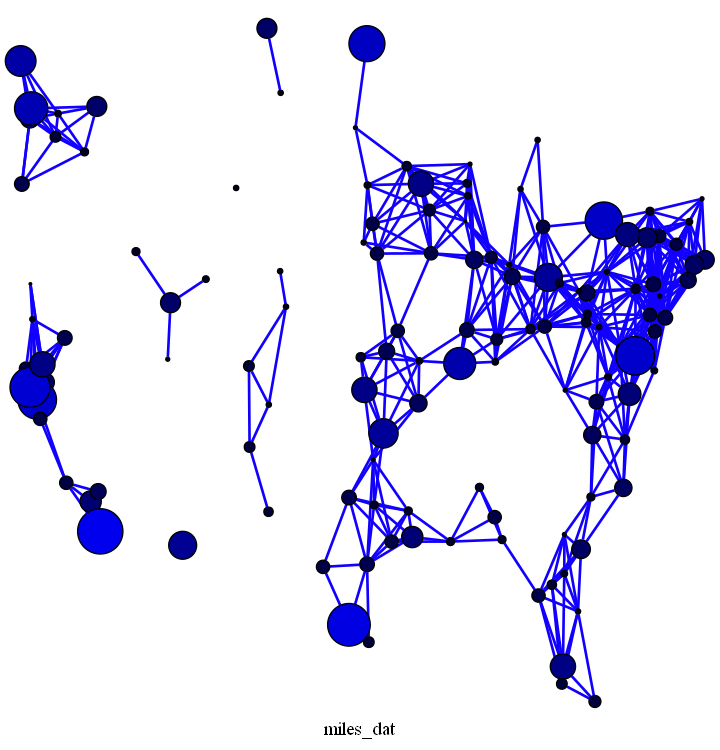

In [6]:

from IPython.display import Image

Image(filename=file_path) 

In [9]:

formats_list = ['bmp', 'canon', 'cmap', 'cmapx', 'cmapx_np', 'dot', 'dot_json', 'emf', 'emfplus', 'eps', 'fig', 'gif', 'gv',
                'imap', 'imap_np', 'ismap', 'jpe', 'jpeg', 'jpg', 'json', 'json0', 'metafile', 'mp', 'pdf', 'pic', 'plain',
                'plain-ext', 'png', 'ps', 'ps2', 'svg', 'tif', 'tiff', 'tk', 'vml', 'xdot', 'xdot1.2', 'xdot1.4', 'xdot_json']
for fmt in formats_list:
    dir_path = os.path.join('..', 'saves', fmt)
    os.makedirs(name=dir_path, exist_ok=True)
    file_path = os.path.join(dir_path, f'miles.{fmt}')
    try:
        G.draw(file_path, format=fmt, prog='neato', args='-n2')
    except Exception as e:
        print(f'Got this when trying to save as {fmt}: {str(e).strip()[:80]}')

Got this when trying to save as cmap: Warning: node 'Yankton, SD', graph 'miles_dat' size too small for label
Warning
Got this when trying to save as ismap: Warning: node 'Yankton, SD', graph 'miles_dat' size too small for label
Warning
Got this when trying to save as metafile: Warning: node 'Yankton, SD', graph 'miles_dat' size too small for label
Warning
